predicted begin lat mean  38.172122809514754


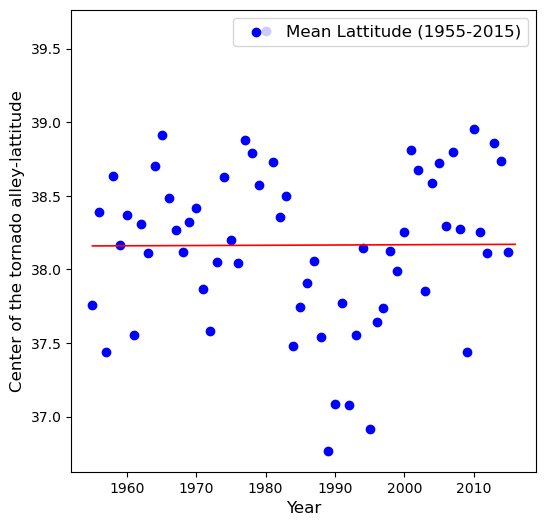

predicted begin lon mean  -89.58775969251982


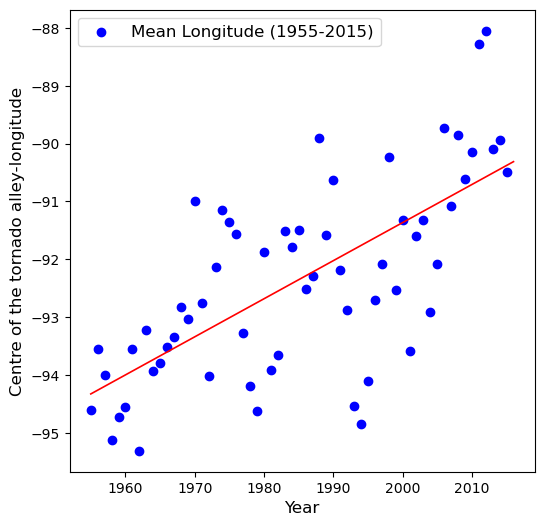

predicted begin lat std  4.025946051761794


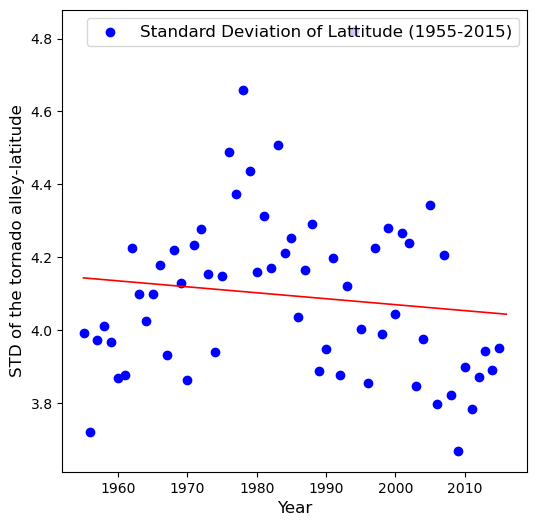

predicted begin lon std  8.061005398853801


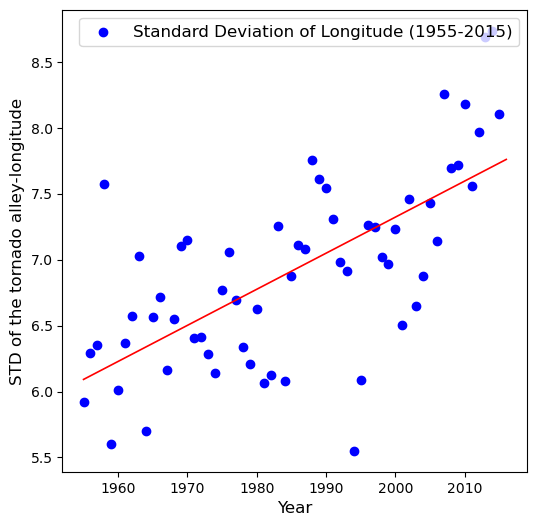

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

#load dataframe

regress_df = pd.read_csv("regressdf_all.csv")

prediction_year = 2027 #change according to the year which we want the prediction for

#target 1: mean tornado origin latitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#optional: print the coefficients
#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]
predicted_lat_mean = b1*prediction_year + b0
print("predicted begin lat mean ",predicted_lat_mean )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Lattitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Center of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 2: mean tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_mean = b1*prediction_year + b0
print("predicted begin lon mean ", predicted_lon_mean )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Mean Longitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Centre of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 3: standard deviation tornado origin latitude


X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lat_std = b1*prediction_year + b0
print("predicted begin lat std ",predicted_lat_std )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Standard Deviation of Lattitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-latitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 4: standard deviation tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_std = b1*prediction_year + b0
print("predicted begin lon std ", predicted_lon_std )


#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Standard Deviation of Longitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()


Cross validation:

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lat_mean']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
mse_scores = -scores

# Results
print("MSE for 'begin_lat_mean' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev:", np.std(mse_scores))

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lat_std']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
mse_scores = -scores

# Results
print("MSE for 'begin_lat_std' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev:", np.std(mse_scores))

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lon_mean']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
mse_scores = -scores

# Results
print("MSE for 'begin_lon_mean' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev:", np.std(mse_scores))

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lon_std']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
mse_scores = -scores

# Results
print("MSE for 'begin_lon_std' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev:", np.std(mse_scores))

MSE for 'begin_lat_mean' ~ year: [0.20144786 0.16410785 0.61043509 0.42281969 0.54632404]
Mean MSE: 0.3890269072452295
Std Dev: 0.17926539417601545
MSE for 'begin_lat_std' ~ year: [0.15258787 0.07805652 0.03584256 0.07300622 0.12589988]
Mean MSE: 0.09307860946569957
Std Dev: 0.04128708519468042
MSE for 'begin_lon_mean' ~ year: [0.54587613 2.06716725 1.16394106 3.91813303 2.89955404]
Mean MSE: 2.118934302933595
Std Dev: 1.2029702551856736
MSE for 'begin_lon_std' ~ year: [0.37350328 0.15038694 0.26375923 0.62931529 0.75998526]
Mean MSE: 0.43538999825779134
Std Dev: 0.22692859402830445
